# Comparing the electrophysiological features of cells

We've talked about various membrane properties like resistance and capacitance, but how do these actually play out in real cells, which are morphologically diverse?

![](https://canvas.brown.edu/courses/851434/files/38768331/preview?verifier=D6ZNKahSL6e9e6xh4GMAfbbSJK6ynSYYQwmcKBo8)

This notebook will load and plot a dataset with various features for mouse or human cells that were curated from the [Allen Cell Types](https://celltypes.brain-map.org/) database. By doing so, we'll be able to test our hypothesis about the relationship between different electrophysiological features of cells, such as their surface area, rheobase, time constant, and input resistance.
<hr>

### Table of contents
- [Setup](#setup)
- [Load the dataset](#load)
- [Compare all features](#overview)
- [Focus on features to compare](#compare)

<a id="setup"></a>
## Setup

First, we need to import a variety of plotting and scientific computing packages. We'll also make sure that plots happen inline and in high resolution.

><b>Task</b>: Run the cell below.

In [5]:
# Import plotting packages
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Import pandas and numpy for working with databases
import pandas as pd
import numpy as np
import urllib.request # Import urllib for obtaining data
from scipy import stats

print('Packages imported.')

Packages imported.


<a id="load"></a>
## Load the dataset
><b>Task</b>: Choose to work with the mice or human dataset by uncommenting (removing the `#`) from one of the `dataset` lines below. Then, run the cell.

In [3]:
# Uncomment one of the lines below!
dataset = 'human_cell_metrics.csv'
#dataset = 'mouse_cell_metrics.csv'

github_url = 'https://github.com/ajuavinett/FUN_2023/blob/1192582afbbe40d2d88e9f5c8da7ff15ce1c91af/Data/'
data_url = github_url + dataset + '?raw=true'
path, headers = urllib.request.urlretrieve(data_url, './human_cell_metrics.csv')

dataset = pd.read_csv(path)

print('Number of cells: ' + str(len(dataset)))

# Show the first five rows of the dataset
dataset.head()

Number of cells: 156


,cell_surface_area,dendrite_type,rheobase,input_resistance,tau
0,497.493364,spiny,129.999997,66.745424,50.049031
1,803.463769,aspiny,210.000003,126.099720,7.177321
2,294.496426,spiny,129.999997,310.081920,14.055187
3,590.989132,aspiny,69.999999,208.228560,18.539072
4,886.070983,aspiny,289.999996,139.217248,5.725947


<a id="focus"></a>
## Focus on features to compare
As you can see in the first five rows of the dataset above, this dataset contains observations about the following features:
- (estimated) cell surface area (in µm^2)
- dendrite type (spiny, aspiny, or sparsely spiny)
- rheobase (in nA)
- input resistance (in MOhms)
- tau (in ms)

Each row of the dataset contains all of these features for individual cells. Let's see if any of these features are related. In fact, chances are you have an <i>a priori</i> hypothesis about the relationship between two of these features, based on what we've talked about in class.

To easily generate a plot of two variables, we can use [matplotlib's scatterplot function](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html). We're going to refer to each of the columns in the Pandas dataframe using the syntax `dataframe['COLUMN']`.

><b>Task</b>: Create a plot of <b>two</b> different metrics above by substituting the feature for the <i>exact</i> name of the column in the data for the feature you'd like to investigate. The spelling needs to be exact in order for it to work -- <code>cell_surface_features</code> is not the same thing as <code>cell surface features</code>. For some of these comparisons, it may be most useful to plot the comparisons on a log scale.

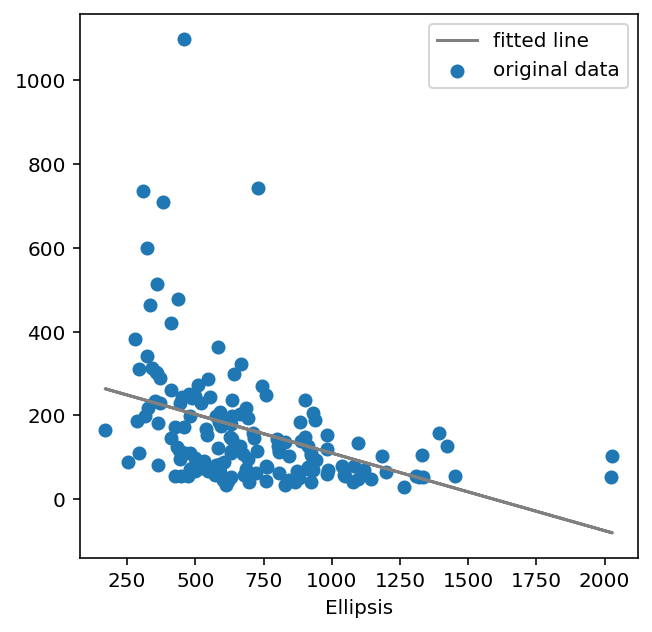

In [9]:
# Choose features to compare
x = dataset['cell_surface_area']
y = dataset['input_resistance']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

# Plot regression line, using the slope & intercept
fig = plt.figure(figsize=(5,5))
plt.plot(x, slope*x+intercept, color='gray',label='fitted line')

# Plot our original data points and show
plt.scatter(x,y,label='original data')
plt.legend()

# Add axes labels here


plt.show()

><b>Task</b>: Right click on your figure to save it as "cell_features_comparison.png". Make sure your graph has clearly labeled axes with units. You can add `plt.xlabel('YOUR LABEL')` and `plt.yabel('YOUR LABEL')` under `# Add axes labels here` to do so.

## What's happening with the "linear regression" above?
If we have an a priori hypothesis about the relationship between our variables, or would like to predict additional data points, we can attempt to fit a linear regression line to our data. To do so, we do the following:

1. Perform a linear regression using `linregress()` from the `stats` library. The [`linregress()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html) function calculates a **linear least-squares regression** for two sets of measurements. It returns several parameters, including the slope (`slope`), the y-intercept (`intercept`), the correlation coefficient (`r_value`), the two-tailed p-value (`p_value`), and the standard error of the estimate (`std_err`).
2. Plot the regression line, using the computed slope and intercept to construct it (mx+b).
3. Plot the original data points.

It is also a good idea to print the computed statistics from our linear regression above. These are contained in `r_value` and `p_value`:

* `r_value`: This is the Pearson correlation coefficient. It measures the strength and direction of the linear relationship between the two variables. It ranges from -1 to 1, where a value of -1 indicates a strong negative linear relationship, a value of 0 indicates no linear relationship, and a value of 1 indicates a strong positive linear relationship.
* `p_value`: The p-value for a hypothesis test whose null hypothesis is that the slope is zero (in other words, that there is no relationship between x and y. A smaller p value (we typically use a 0.05 cutoff) suggests that it is unlikely the slope is zero.

It can also be helpful to look at `std_err`: the standard error of the estimate. It represents the standard deviation of the residuals (the differences between the observed y values and the predicted y values). A small standard error indicates that the fitted line is a good fit for the data.

> **Task**: Print your values for `r_value`,`p_value`, and `std_err` in the cell below by replacing the `...` with the value you'd like to print. You can list multiple values in one print statement (e.g., `print(a,b,c,)`) or have multiple print lines.

In [ ]:
print(...)

<a id="overview"></a>
## Compare all of the features in this dataset

We have lots of features to look at -- thankfully, there are fun data science visualization tools to let us look at them all together.

Below, we'll use a really handy tool from Seaborn called [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) which will plot a grid of all of these cell features against eachother. It will also show us a histogram of values for each of the features -- an important first step of working with any data.

><b>Task</b>: Run the cell below! It may take a few seconds to run. You can uncomment the line that says <code>set(xscale='log')</code> if you'd like to see what this looks like on a log scale.

In [ ]:
pairplot = sns.pairplot(dataset,height=2)
#pairplot.set(xscale='log',yscale='log') # this changes both x and y scale to log
plt.show()

### Site note: What does log-scaling mean?

The four-by-four figure that is produced above shows many potentially interesting relationships between these cell features! The relationship between features is even more clear when we plot the axes on a log-scale. Why is this?

To understand why this is, let's develop our intuition for what log-scaling even means. First, we'll create a list of 10 numbers, from 1 to 10, evenly spaced by one.

In [ ]:
x = np.arange(1,11,1) # Use np.arange() to create a simple list
print(x)

><b>Task</b>: Use this list <code>x</code> to create <code>y</code> which is composed of 2^ each value in <code>x</code>. You can write this as `2**x`. In other words, we're making a list of exponentially increasing values. In other, other words, the values increase by an *order of magnitude*. Print your list of y values so that you can see what you've created.

In [ ]:
y = ...

><b>Task</b>: Plot these vectors we just created using <code>plt.plot(x,y,marker='.')</code> in the cell below. Don't forget to add <code>plt.show()</code> to cleanly show just the plot.


In [ ]:
# Add your plot here!


So, this is what our artificial data looks like when the data is plotted on a linear scale (1-10). What happens when we plot the data on a log scale, where each equally spaced tick mark actually increases by a factor of 10?

><b>Task</b>: Since our y-scale is the one that rises exponentially, let's add <code>plt.yscale('log')</code> <i>before</i> <code>plt.show()</code> in the code block above so that the y-axis will be plotted on a log-scale. <b>How does this change the relationship between the variables in your plot?</b>

For sets of data that change by orders of magnitude, log-scaled axes can help us more clearly see relationships between variables. For an in depth explanation of log scales, see this [Khan Academy Video](https://www.khanacademy.org/math/algebra-home/alg-exp-and-log/alg-logarithmic-scale/v/logarithmic-scale). For a consideration of *when* you should use log scales, see [this article](https://www.forbes.com/sites/naomirobbins/2012/01/19/when-should-i-use-logarithmic-scales-in-my-charts-and-graphs/#52b49d675e67).

In [ ]:
from IPython.display import HTML
HTML('<img src="https://media.giphy.com/media/l0MYt5jPR6QX5pnqM/giphy.gif">')